In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  
import plotly.express as px 
import warnings as wr
wr.filterwarnings("ignore")


df = pd.read_csv("data actual time work 2023.csv")

In [146]:
df.describe()

,Quantity,Time,Direct \nCost,Overhead \nCost
count,11033.000000,11033.000000,11033.000000,11033.000000
mean,11.757926,47.268491,1074.282201,1495.972165
std,60.904721,202.490541,4883.047788,6958.167043
min,0.510000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,45.000000,37.000000
50%,2.000000,12.000000,299.990000,370.000000
75%,5.000000,40.000000,1000.000000,1304.950000
max,1500.000000,10000.000000,250000.000000,370000.000000


In [147]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11033 entries, 0 to 11032
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Posting Date      11033 non-null  object 
 1   Order No.         11033 non-null  object 
 2   Item              11033 non-null  object 
 3   Quantity          11033 non-null  float64
 4   Department        11033 non-null  object 
 5   Time              11033 non-null  float64
 6   Direct 
Cost      11033 non-null  float64
 7   Overhead 
Cost    11033 non-null  float64
 8   Departement Code  11033 non-null  object 
 9   Sales order       11033 non-null  object 
dtypes: float64(4), object(6)
memory usage: 862.1+ KB


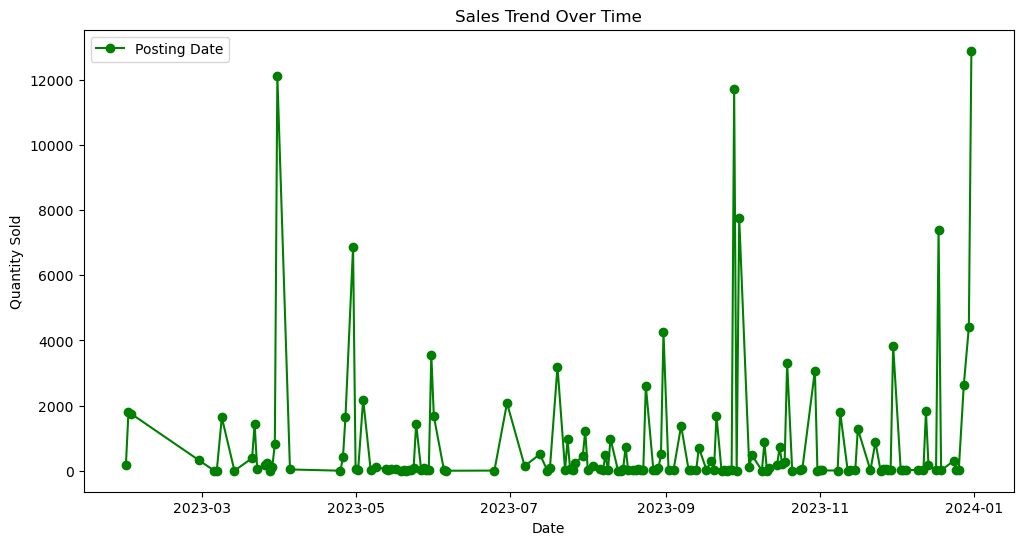

In [148]:
df["Posting Date"]=pd.to_datetime(df["Posting Date"])
df_daily=df.groupby("Posting Date")["Quantity"].sum().reset_index()
plt.figure(figsize=(12,6))
plt.plot(df_daily["Posting Date"],df_daily["Quantity"],marker="o",linestyle="-",color="green")
plt.xlabel("Date")
plt.ylabel("Quantity Sold")
plt.title("Sales Trend Over Time")
plt.legend(df_daily)
plt.show()

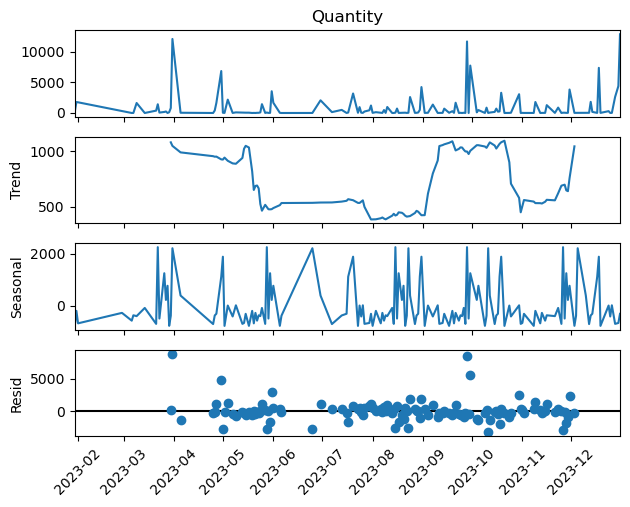

In [149]:
from statsmodels.tsa.seasonal import seasonal_decompose
df_daily.set_index("Posting Date", inplace=True)
result = seasonal_decompose(df_daily["Quantity"], model='additive', period=30) 
result.plot()
plt.xticks(rotation=45)
plt.show()

In [150]:
df.isnull().sum()

Posting Date        0
Order No.           0
Item                0
Quantity            0
Department          0
Time                0
Direct \nCost       0
Overhead \nCost     0
Departement Code    0
Sales order         0
dtype: int64

In [151]:
df.nunique()

Posting Date         150
Order No.           3990
Item                 120
Quantity             424
Department             7
Time                 937
Direct \nCost        743
Overhead \nCost      693
Departement Code       6
Sales order          305
dtype: int64

In [152]:
df.shape

(11033, 10)

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11033 entries, 0 to 11032
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Posting Date      11033 non-null  datetime64[ns]
 1   Order No.         11033 non-null  object        
 2   Item              11033 non-null  object        
 3   Quantity          11033 non-null  float64       
 4   Department        11033 non-null  object        
 5   Time              11033 non-null  float64       
 6   Direct 
Cost      11033 non-null  float64       
 7   Overhead 
Cost    11033 non-null  float64       
 8   Departement Code  11033 non-null  object        
 9   Sales order       11033 non-null  object        
dtypes: datetime64[ns](1), float64(4), object(5)
memory usage: 862.1+ KB


In [154]:
df.describe()

,Posting Date,Quantity,Time,Direct \nCost,Overhead \nCost
count,11033,11033.000000,11033.000000,11033.000000,11033.000000
mean,2023-07-22 12:54:37.295386624,11.757926,47.268491,1074.282201,1495.972165
min,2023-01-30 00:00:00,0.510000,0.000000,0.000000,0.000000
25%,2023-04-30 00:00:00,1.000000,3.000000,45.000000,37.000000
50%,2023-07-24 00:00:00,2.000000,12.000000,299.990000,370.000000
75%,2023-10-19 00:00:00,5.000000,40.000000,1000.000000,1304.950000
max,2023-12-31 00:00:00,1500.000000,10000.000000,250000.000000,370000.000000
std,NaN,60.904721,202.490541,4883.047788,6958.167043


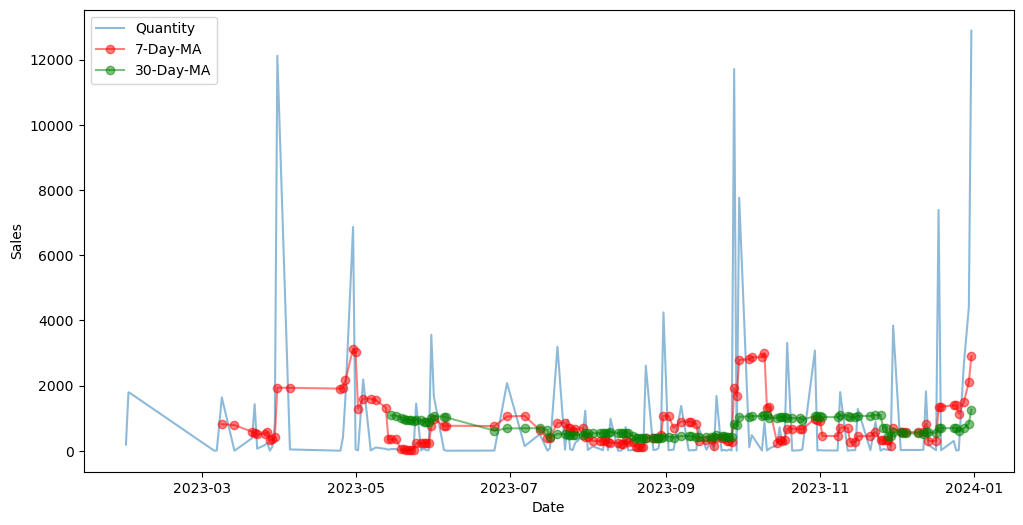

In [155]:
df_daily["7-Day-MA"]=df_daily["Quantity"].rolling(window=7).mean() 
df_daily["30-Day-MA"]=df_daily["Quantity"].rolling(window=30).mean() 
plt.figure(figsize=(12,6))
plt.plot(df_daily.index,df_daily["Quantity"],label="Daily Sales",alpha=0.5)
plt.plot(df_daily.index,df_daily["7-Day-MA"],label="7 Day Moving AVG",alpha=0.5,marker="o",linestyle="-",color="red")
plt.plot(df_daily.index,df_daily["30-Day-MA"],label="30 Day Moving AVG",alpha=0.5,marker="o",linestyle="-",color="green")
plt.legend(df_daily)
plt.xlabel("Date")
plt.ylabel("Sales")

plt.show()


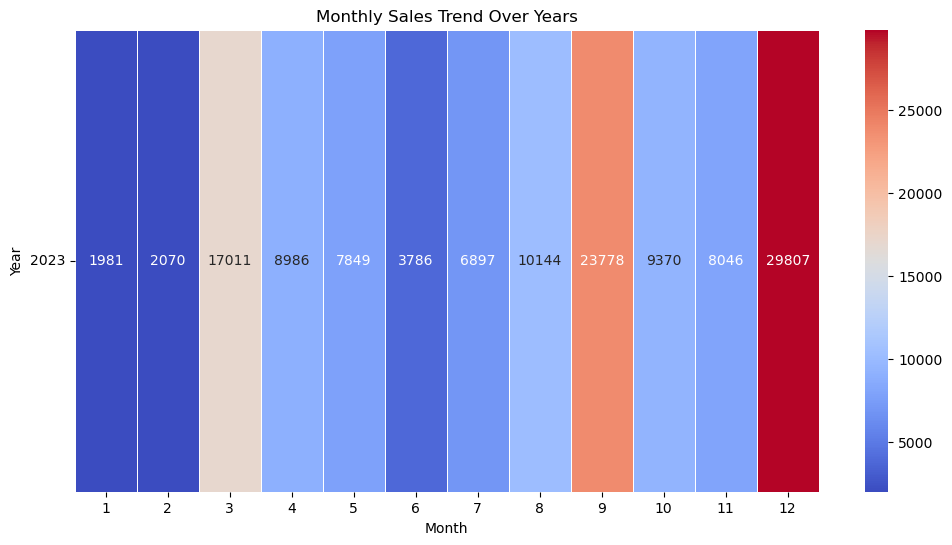

In [156]:

df["Posting Date"] = pd.to_datetime(df["Posting Date"])

df["Year"] = df["Posting Date"].dt.year
df["Month"] = df["Posting Date"].dt.month

monthly_sales = df.groupby(["Year", "Month"])["Quantity"].sum().reset_index()

monthly_sales_pivot = monthly_sales.pivot(index="Year", columns="Month", values="Quantity").fillna(0)

plt.figure(figsize=(12, 6))
sns.heatmap(monthly_sales_pivot, annot=True, fmt=".0f", cmap="coolwarm", linewidths=0.5)

plt.title("Monthly Sales Trend Over Years")
plt.xlabel("Month")
plt.ylabel("Year")
plt.yticks(rotation=0)
plt.show()

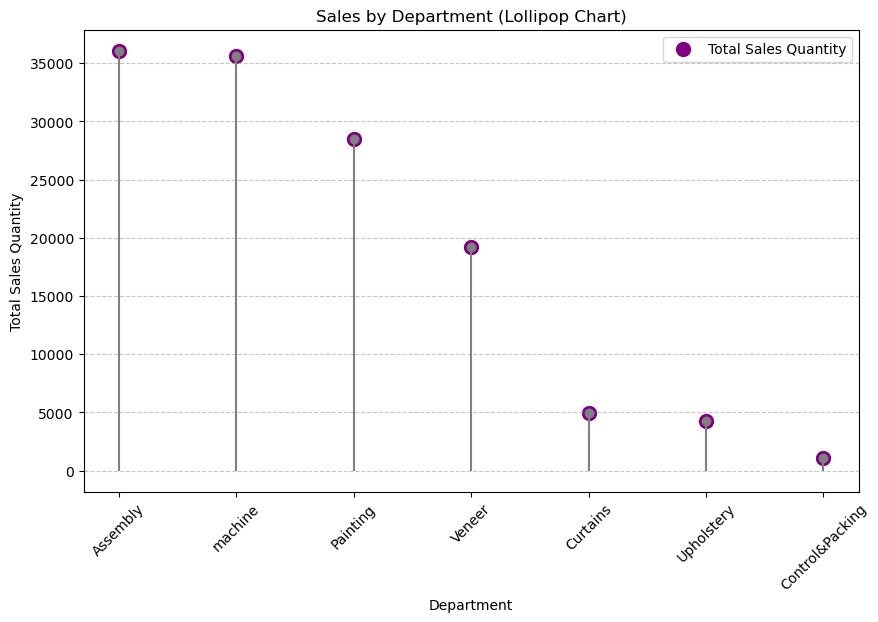

In [157]:

dept_sales = df.groupby("Department")["Quantity"].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))

x = np.arange(len(dept_sales))
y = dept_sales.values

plt.stem(x, y, linefmt="gray", markerfmt="o", basefmt=" ")

plt.scatter(x, y, color="purple", s=100, label="Total Sales Quantity")

plt.xticks(x, dept_sales.index, rotation=45)
plt.xlabel("Department")
plt.ylabel("Total Sales Quantity")
plt.title("Sales by Department (Lollipop Chart)")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

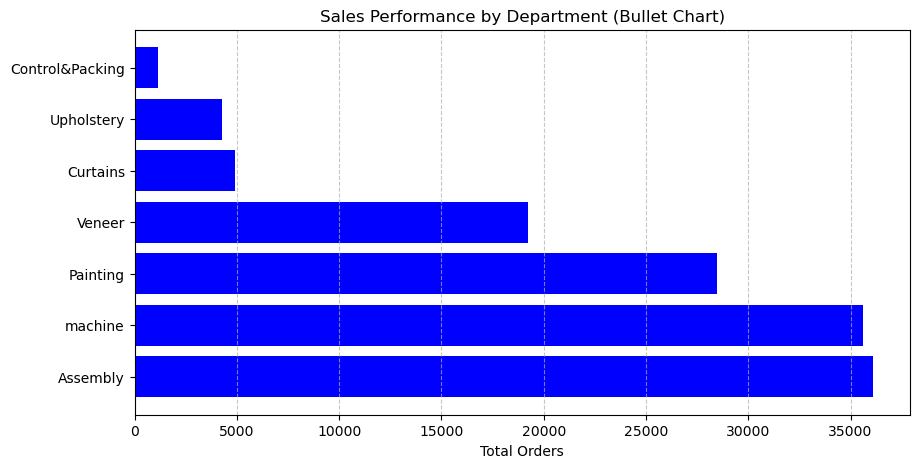

In [158]:

import matplotlib.patches as patches

fig, ax = plt.subplots(figsize=(10, 5))

for i, (dept, sales) in enumerate(zip(dept_sales.index, dept_sales.values)):
    ax.barh(dept, 100, color="gray", alpha=0.3)  # Benchmark level
    ax.barh(dept, sales, color="blue")  # Actual sales

ax.set_xlabel("Total Orders")
ax.set_title("Sales Performance by Department (Bullet Chart)")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

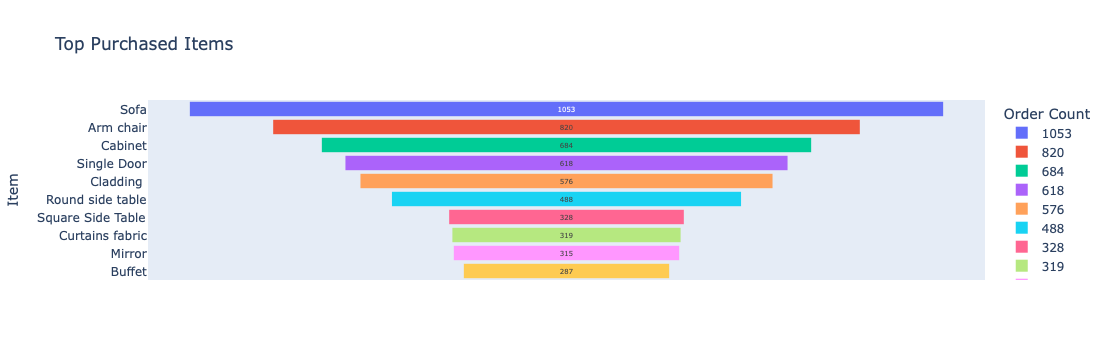

In [188]:
item_orders = df.groupby("Item")["Order Count"].sum().sort_values(ascending=False)


top_items = item_orders[:10].reset_index()

fig = px.funnel(top_items, x="Order Count", y="Item", title="Top Purchased Items",
                color="Order Count")
fig.show()

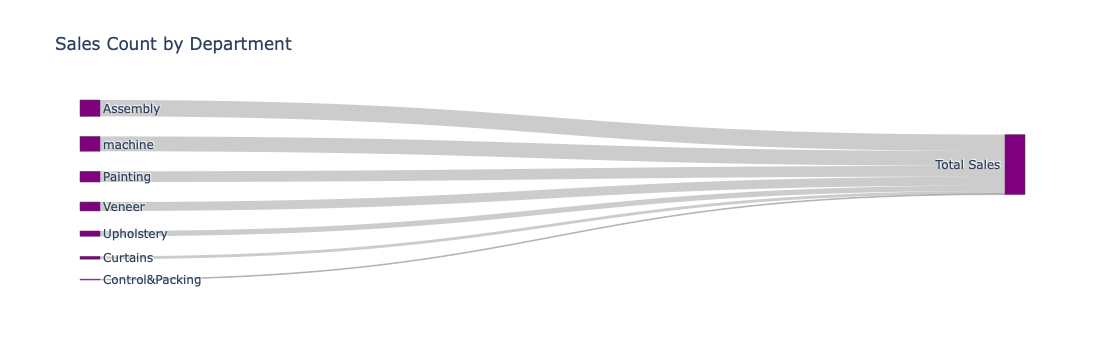

In [161]:

dept_counts = df["Department"].value_counts()
labels = dept_counts.index.tolist() + ["Total Sales"]
sources = list(range(len(dept_counts)))
targets = [len(dept_counts)] * len(dept_counts)  # Linking departments to 'Total Sales'
values = dept_counts.values.tolist()

fig = go.Figure(go.Sankey(
    node={"label": labels, "color": "purple"},
    link={"source": sources, "target": targets, "value": values}
))

fig.update_layout(title_text="Sales Count by Department", font_size=12)
fig.show()

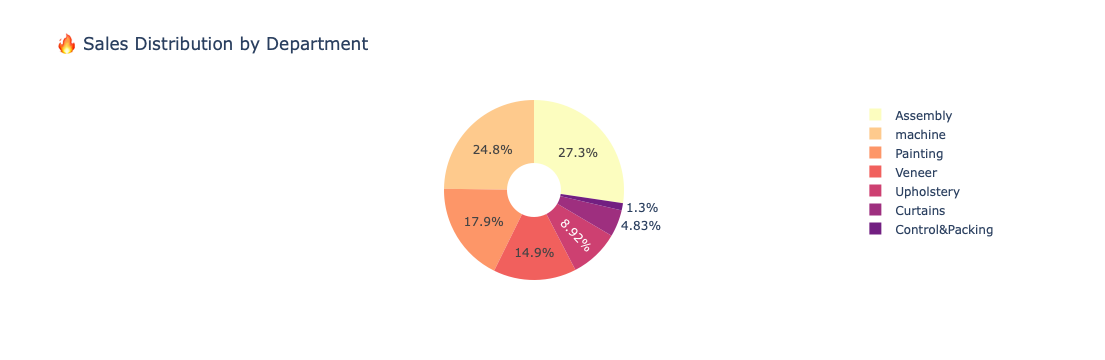

In [163]:

dept_sales = df.groupby("Department")["Sales order"].count().reset_index()

dept_sales = dept_sales.sort_values(by="Sales order", ascending=False)

colors = px.colors.sequential.Magma[::-1]  

fig = px.pie(
    dept_sales,
    names="Department",
    values="Sales order",
    title="🔥 Sales Distribution by Department",
    hole=0.3,  
    color=dept_sales["Department"],  
    color_discrete_sequence=colors 
)

fig.show()

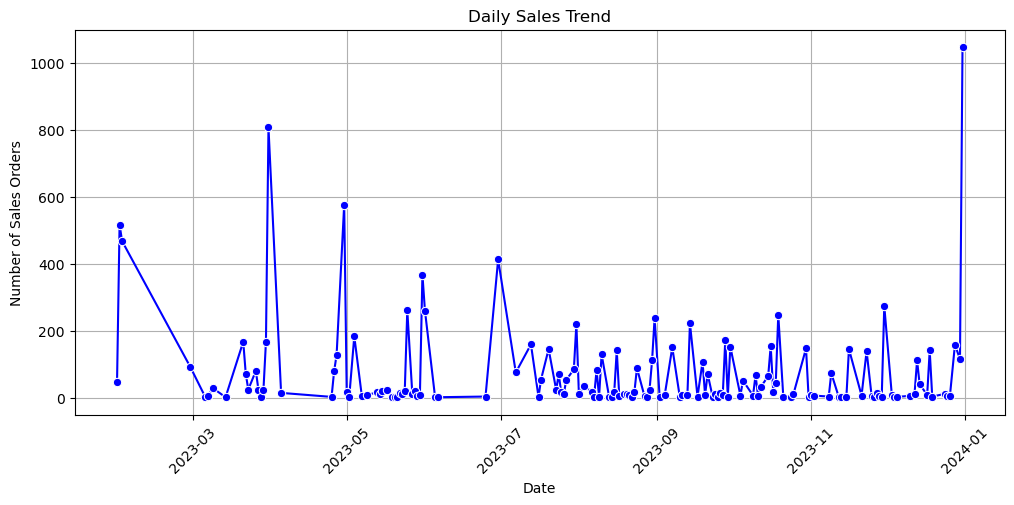

In [164]:

df["Posting Date"] = pd.to_datetime(df["Posting Date"])
daily_sales = df.groupby("Posting Date")["Sales order"].count().reset_index()

plt.figure(figsize=(12, 5))
sns.lineplot(x="Posting Date", y="Sales order", data=daily_sales, marker="o", color="blue")
plt.title("Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("Number of Sales Orders")
plt.xticks(rotation=45)
plt.grid()
plt.show()

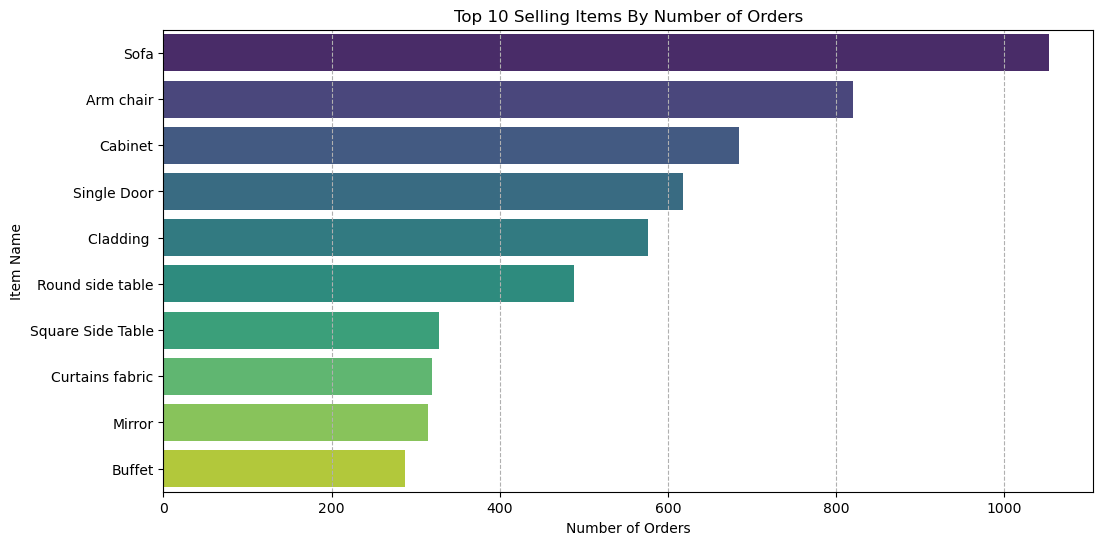

In [165]:
plt.figure(figsize=(12, 6))
top_items = df["Item"].value_counts().nlargest(10)  # Top 10 selling items
sns.barplot(x=top_items.values, y=top_items.index, palette="viridis")
plt.xlabel("Number of Orders")
plt.ylabel("Item Name")
plt.title("Top 10 Selling Items By Number of Orders")
plt.grid(axis="x", linestyle="--")
plt.show()

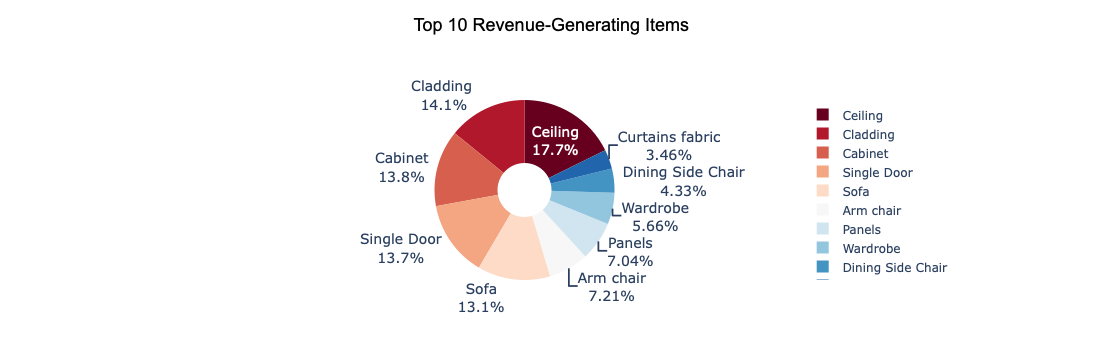

In [187]:
import plotly.express as px

item_sales = df.groupby("Item")["Direct \nCost"].sum().nlargest(10)

fig = px.pie(
    names=item_sales.index, 
    values=item_sales.values, 
    title="Top 10 Revenue-Generating Items",
    color_discrete_sequence=px.colors.sequential.RdBu,
    hole=0.3 
)

fig.update_layout(
    title_x=0.5,  
    title_y=0.95,
    title_font=dict(size=18, family="Arial", color="black")  # Customize font
)

fig.update_traces(textinfo="label+percent", textfont_size=14)  

fig.show()

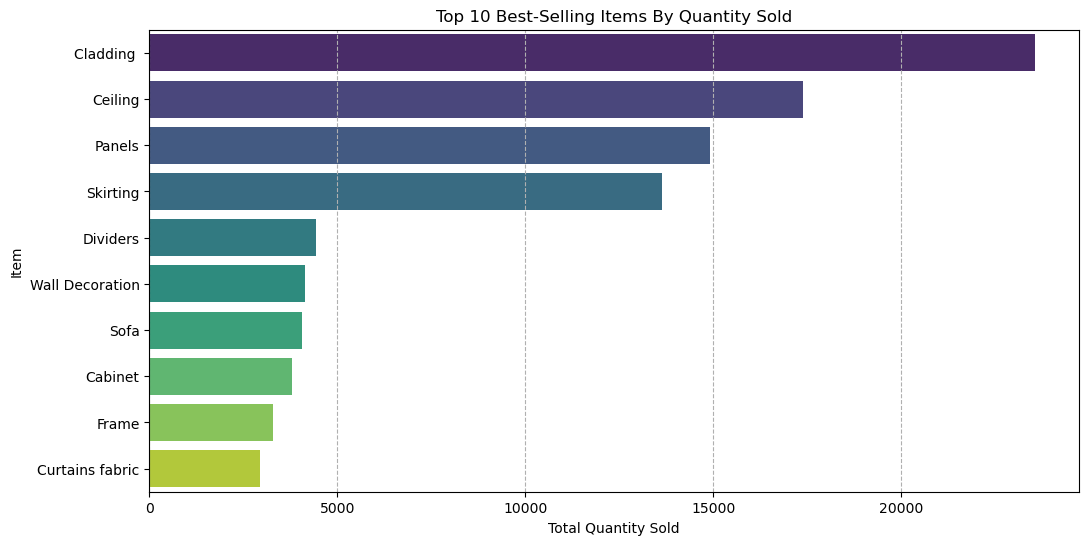

In [167]:
top_items = df.groupby("Item")["Quantity"].sum().reset_index()
top_10_items = top_items.sort_values(by="Quantity", ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(y=top_10_items["Item"], x=top_10_items["Quantity"], palette="viridis")
plt.xlabel("Total Quantity Sold")
plt.ylabel("Item")
plt.title("Top 10 Best-Selling Items By Quantity Sold")
plt.grid(axis="x", linestyle="--")
plt.show()

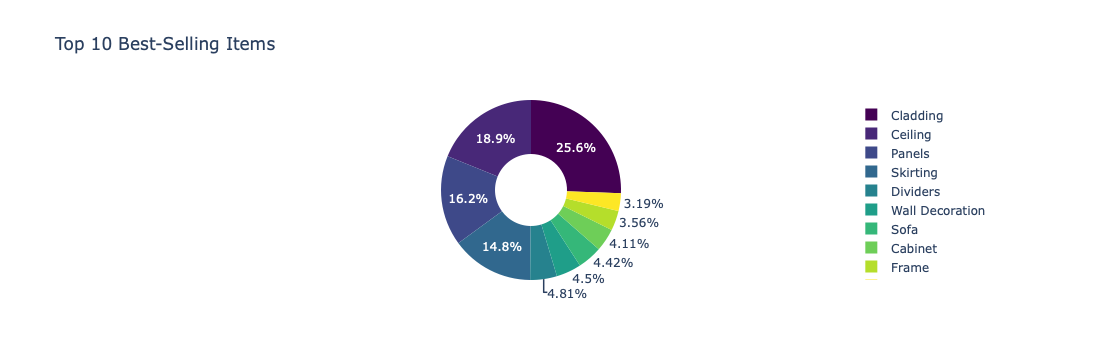

In [168]:
import plotly.express as px

fig = px.pie(
    top_10_items, 
    names="Item", 
    values="Quantity", 
    title="Top 10 Best-Selling Items",
    hole=0.4,  # Creates a donut-style chart
    color_discrete_sequence=px.colors.sequential.Viridis
)

fig.show()

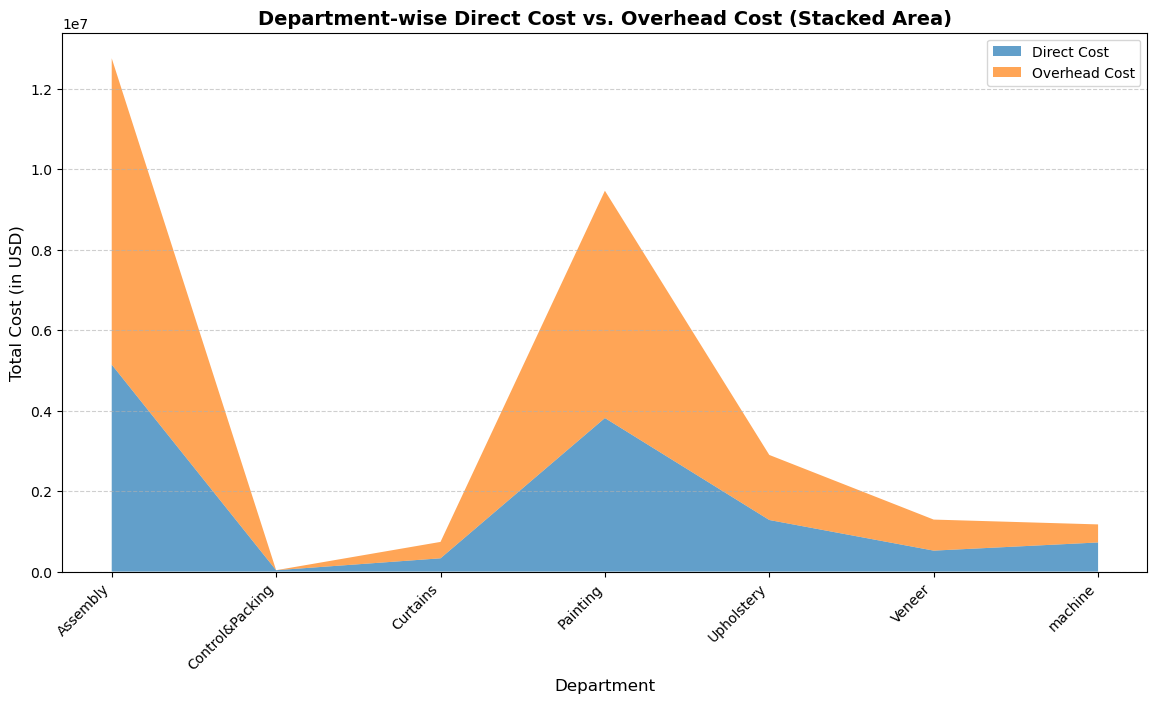

In [169]:
dept_costs = df.groupby("Department")[["Direct \nCost", "Overhead \nCost"]].sum().reset_index()

plt.figure(figsize=(14, 7))
plt.stackplot(dept_costs["Department"], dept_costs["Direct \nCost"], dept_costs["Overhead \nCost"], 
              labels=["Direct Cost", "Overhead Cost"], colors=["#1f77b4", "#ff7f0e"], alpha=0.7)

plt.xlabel("Department", fontsize=12)
plt.ylabel("Total Cost (in USD)", fontsize=12)
plt.title("Department-wise Direct Cost vs. Overhead Cost (Stacked Area)", fontsize=14, fontweight="bold")
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.6)

plt.show()

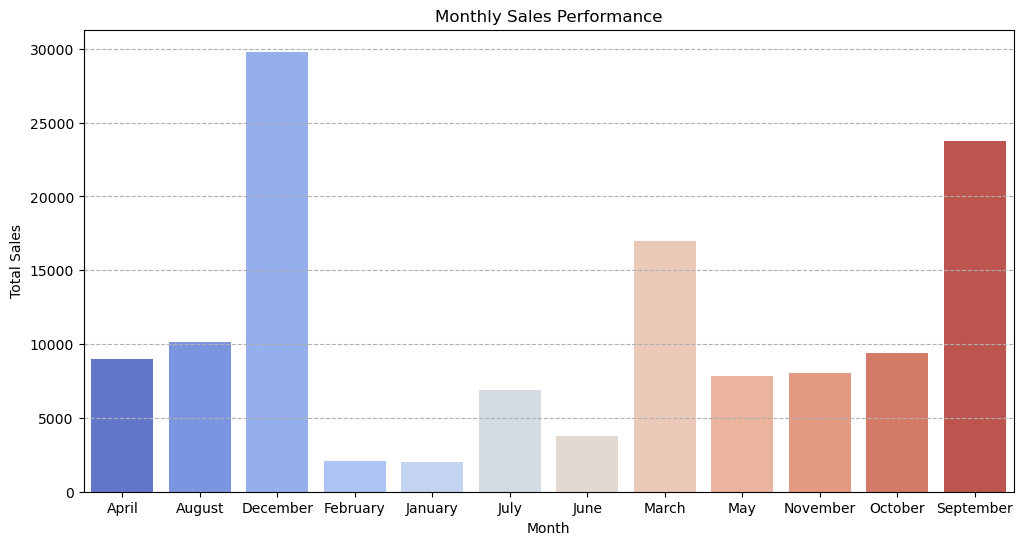

In [171]:

df["Posting Date"] = pd.to_datetime(df["Posting Date"])
df["Month"] = df["Posting Date"].dt.month_name()
df["Hour"] = df["Time"] // 100  



monthly_sales = df.groupby("Month")["Quantity"].sum()
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_sales.index, y=monthly_sales.values, palette="coolwarm")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.title("Monthly Sales Performance")
plt.grid(axis="y", linestyle="--")
plt.show()





<Figure size 1400x600 with 0 Axes>

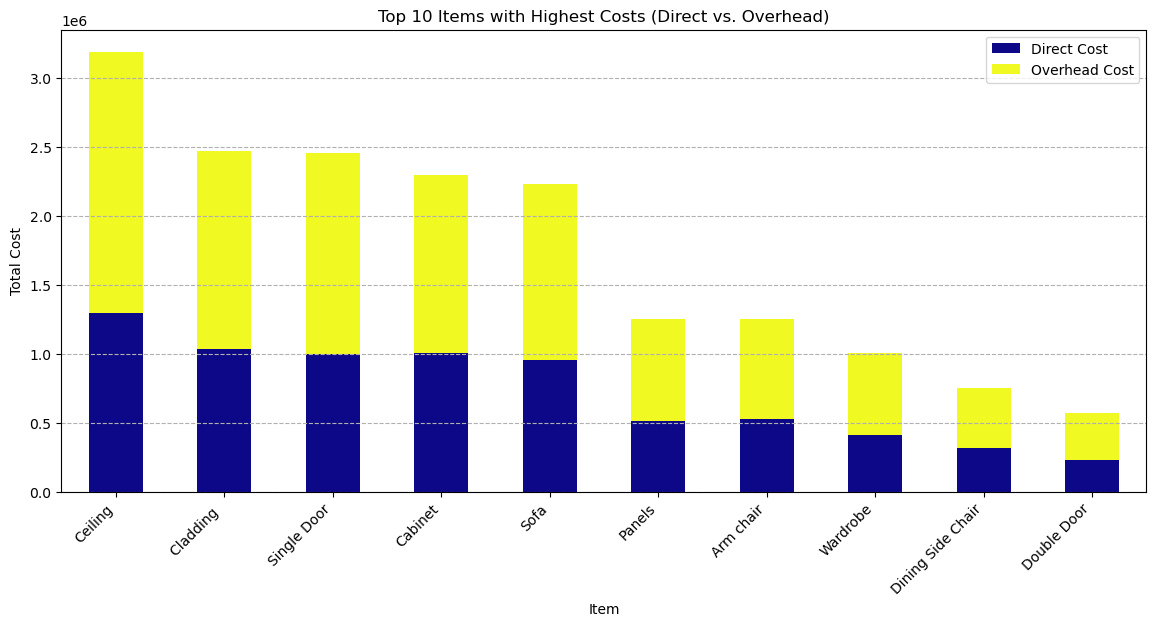

In [172]:

item_costs = df.groupby("Item")[["Direct \nCost", "Overhead \nCost"]].sum().reset_index()

item_costs["Total Cost"] = item_costs["Direct \nCost"] + item_costs["Overhead \nCost"]
top_10_items = item_costs.sort_values(by="Total Cost", ascending=False).head(10).drop(columns=["Total Cost"])

plt.figure(figsize=(14, 6))
top_10_items.set_index("Item").plot(kind="bar", stacked=True, colormap="plasma", figsize=(14, 6))
plt.title("Top 10 Items with Highest Costs (Direct vs. Overhead)")
plt.xlabel("Item")
plt.ylabel("Total Cost")
plt.xticks(rotation=45, ha="right")
plt.legend(["Direct Cost", "Overhead Cost"])
plt.grid(axis="y", linestyle="--")
plt.show()

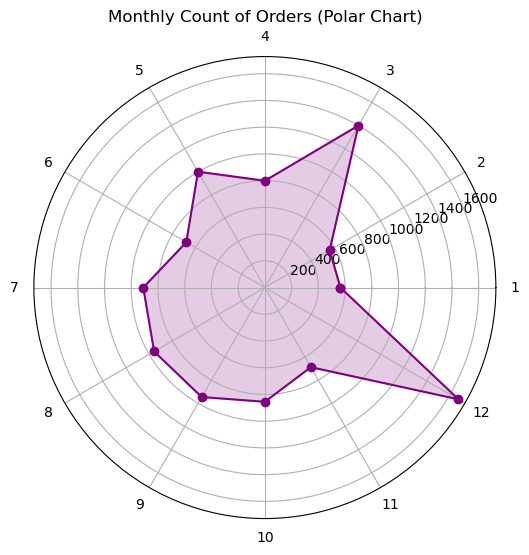

In [174]:

df["Month"] = pd.to_datetime(df["Posting Date"]).dt.month
yearly_orders = df.groupby("Month")["Order Count"].sum().reset_index()

angles = np.linspace(0, 2 * np.pi, len(yearly_orders), endpoint=False).tolist()
values = yearly_orders["Order Count"].tolist()
angles += angles[:1]  # Closing the circle
values += values[:1]

plt.figure(figsize=(6, 6))
ax = plt.subplot(111, polar=True)
ax.plot(angles, values, marker="o", linestyle="-", color="purple")
ax.fill(angles, values, color="purple", alpha=0.2)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(range(1, 13))  # Month labels

plt.title("Monthly Count of Orders (Polar Chart)")
plt.show()

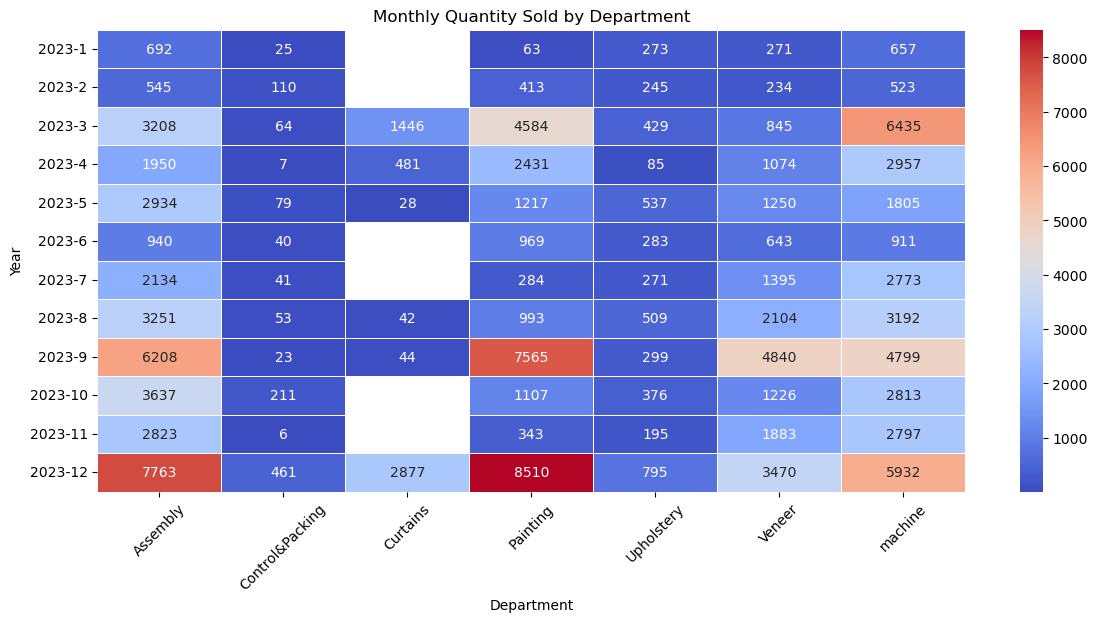

In [175]:

df["Posting Date"] = pd.to_datetime(df["Posting Date"])

df["Year"] = df["Posting Date"].dt.year
df["Month"] = df["Posting Date"].dt.month

monthly_dept_sales = df.groupby(["Year", "Month", "Department"])["Quantity"].sum().unstack()

plt.figure(figsize=(14, 6))
sns.heatmap(monthly_dept_sales, annot=True, fmt=".0f", cmap="coolwarm", linewidths=0.5)
plt.title("Monthly Quantity Sold by Department")
plt.xlabel("Department")
plt.ylabel("Year")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

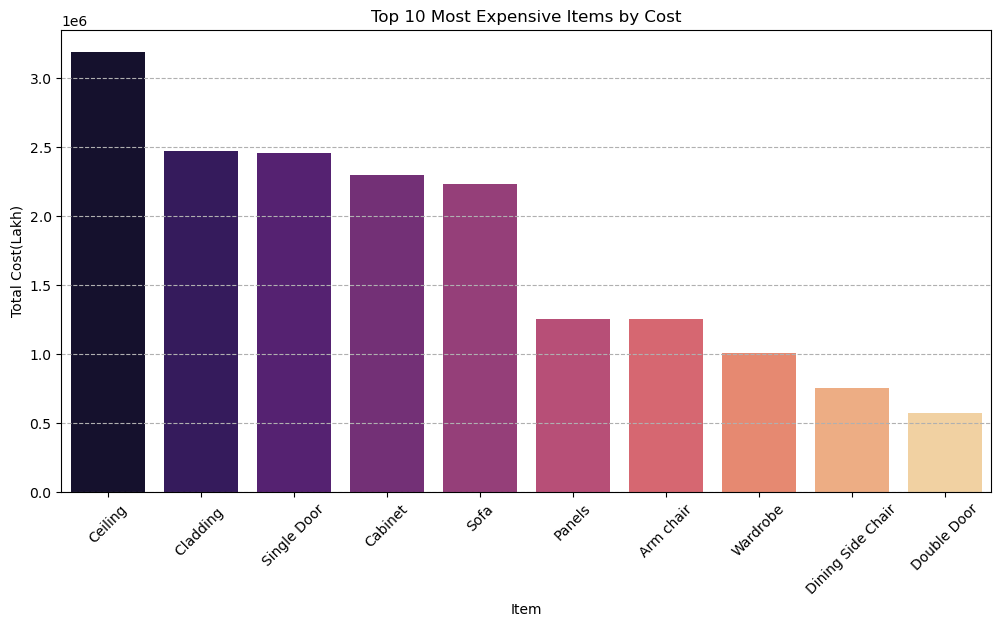

In [190]:
top_items = df.groupby("Item")[["Direct \nCost", "Overhead \nCost"]].sum()
top_items["Total Cost"] = top_items["Direct \nCost"] + top_items["Overhead \nCost"]
top_items = top_items.sort_values("Total Cost", ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_items.index, y=top_items["Total Cost"], palette="magma")
plt.xlabel("Item")
plt.ylabel("Total Cost(Lakh)")
plt.title("Top 10 Most Expensive Items by Cost")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--")
plt.show()



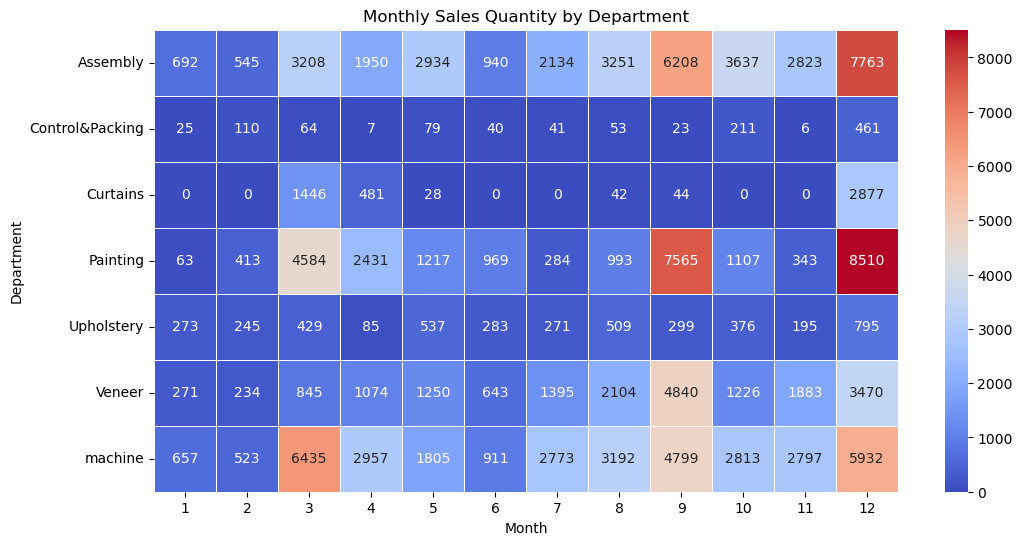

In [177]:
monthly_dept_sales = df.groupby(["Month", "Department"])["Quantity"].sum().reset_index()
monthly_pivot = monthly_dept_sales.pivot(index="Department", columns="Month", values="Quantity").fillna(0)

plt.figure(figsize=(12, 6))
sns.heatmap(monthly_pivot, annot=True, fmt=".0f", cmap="coolwarm", linewidths=0.5)
plt.title("Monthly Sales Quantity by Department")
plt.xlabel("Month")
plt.ylabel("Department")
plt.show()

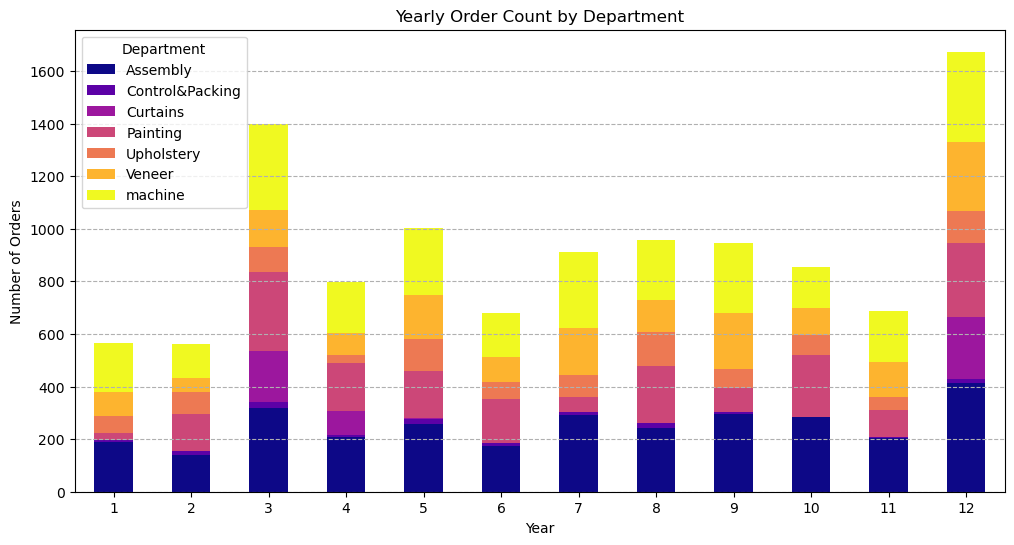

In [189]:
yearly_orders = df.groupby(["Month", "Department"])["Order Count"].sum().unstack()

yearly_orders.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="plasma")
plt.xlabel("Year")
plt.ylabel("Number of Orders")
plt.title("Yearly Order Count by Department")
plt.legend(title="Department")
plt.grid(axis="y", linestyle="--")
plt.xticks(rotation=0)
plt.show()


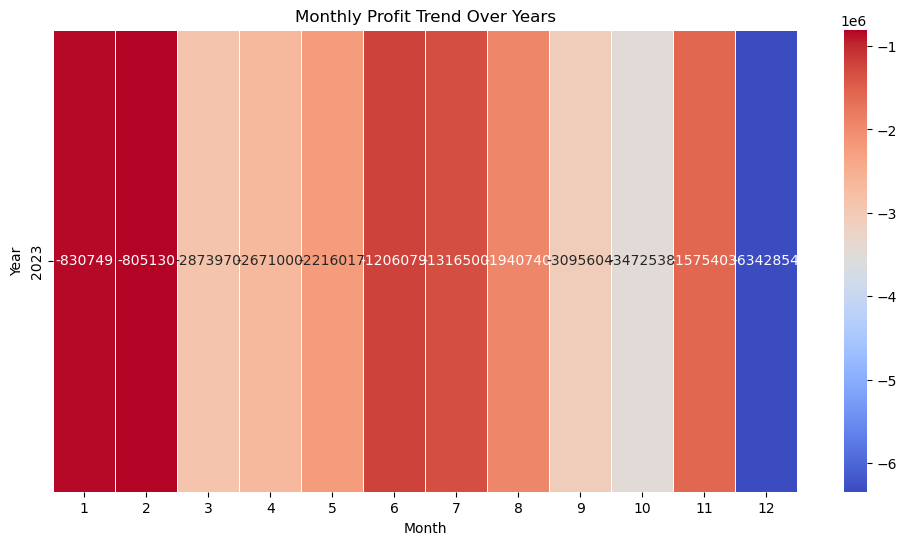

In [186]:
monthly_profit = df.groupby(["Year", "Month"])["Profit"].sum().unstack().fillna(0)

plt.figure(figsize=(12, 6))
sns.heatmap(monthly_profit, annot=True, fmt=".0f", cmap="coolwarm", linewidths=0.5)
plt.title("Monthly Profit Trend Over Years")
plt.xlabel("Month")
plt.ylabel("Year")
plt.show()

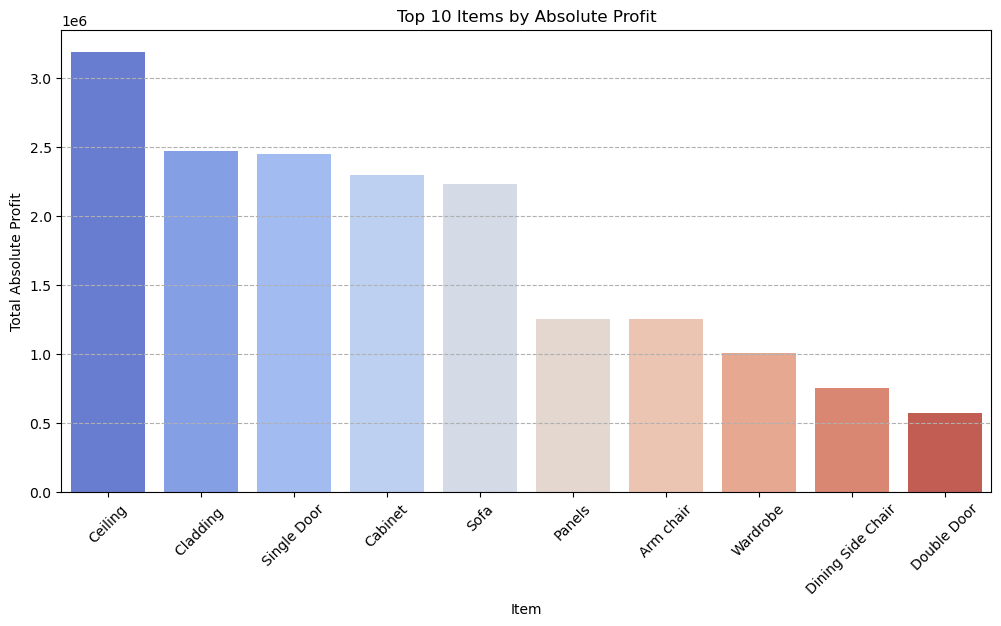

In [182]:
top_profitable_items = df.groupby("Item")["Profit"].sum().abs().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_profitable_items.index, y=top_profitable_items.values, palette="coolwarm")
plt.xlabel("Item")
plt.ylabel("Total Absolute Profit")
plt.title("Top 10 Items by Absolute Profit")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--")
plt.show()

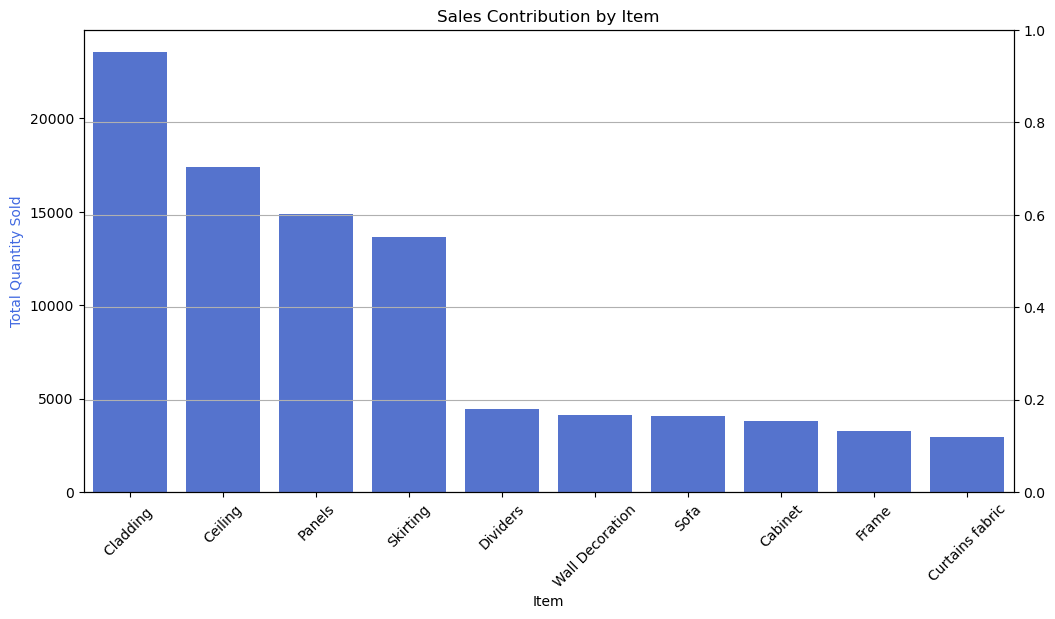

129725.2


In [183]:
item_sales = df.groupby("Item")["Quantity"].sum().sort_values(ascending=False)

fig, ax1 = plt.subplots(figsize=(12, 6))

sns.barplot(x=item_sales.index[:10], y=item_sales.values[:10], ax=ax1, color="royalblue")
ax1.set_xlabel("Item")
ax1.set_ylabel("Total Quantity Sold", color="royalblue")
plt.xticks(rotation=45)

ax2 = ax1.twinx()


plt.title("Sales Contribution by Item")
plt.grid()
plt.show()
print(df["Quantity"].sum())

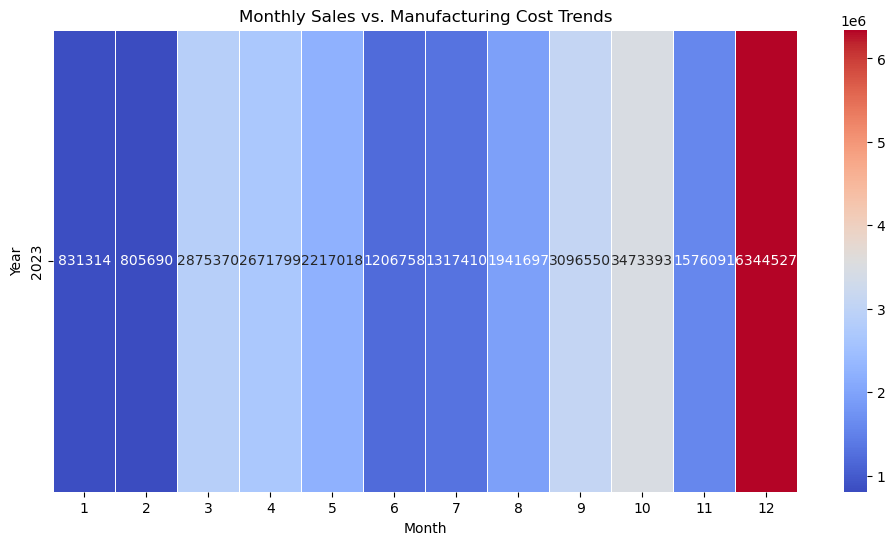

In [184]:
df["Posting Date"] = pd.to_datetime(df["Posting Date"], errors="coerce")  # Convert to datetime
df["Year"] = df["Posting Date"].dt.year
df["Month"] = df["Posting Date"].dt.month

df["Total Cost"] = df["Direct \nCost"] + df["Overhead \nCost"]

monthly_trends = df.groupby(["Year", "Month"]).agg({"Sales order": "count", "Total Cost": "sum"}).reset_index()

monthly_sales_cost = monthly_trends.pivot(index="Year", columns="Month", values="Total Cost")

plt.figure(figsize=(12, 6))
sns.heatmap(monthly_sales_cost, annot=True, fmt=".0f", cmap="coolwarm", linewidths=0.5)
plt.title("Monthly Sales vs. Manufacturing Cost Trends")
plt.xlabel("Month")
plt.ylabel("Year")
plt.show()

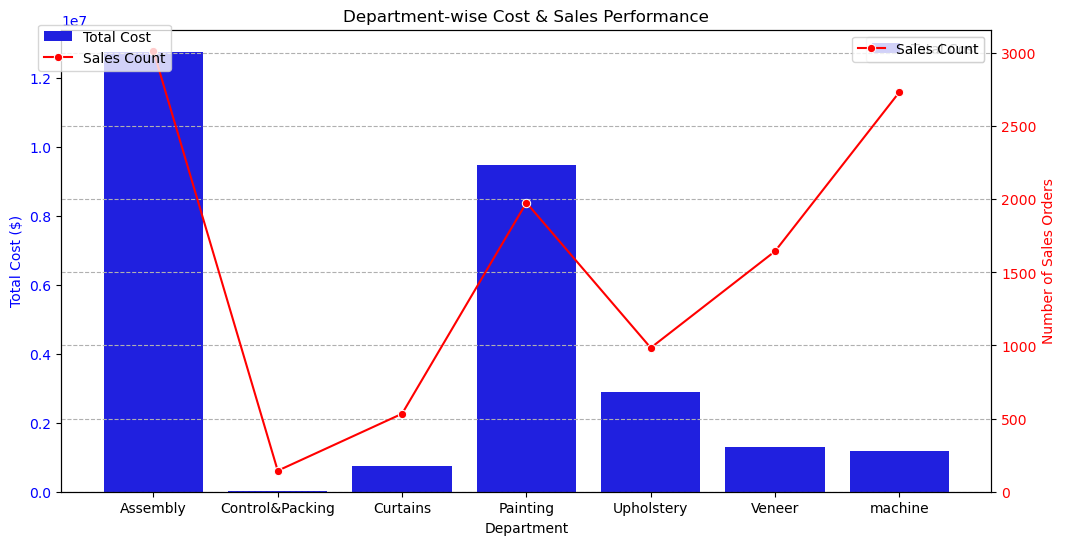

In [185]:
df["Posting Date"] = pd.to_datetime(df["Posting Date"], errors="coerce")
df["Total Cost"] = df["Direct \nCost"] + df["Overhead \nCost"]
dept_analysis = df.groupby("Department").agg({"Total Cost": "sum", "Sales order": "count"}).reset_index()
fig, ax1 = plt.subplots(figsize=(12, 6))
sns.barplot(x="Department", y="Total Cost", data=dept_analysis, ax=ax1, color="blue", label="Total Cost")
ax1.set_ylabel("Total Cost ($)", color="blue")
ax1.tick_params(axis='y', labelcolor="blue")
ax2 = ax1.twinx()
sns.lineplot(x="Department", y="Sales order", data=dept_analysis, ax=ax2, marker="o", color="red", label="Sales Count")
ax2.set_ylabel("Number of Sales Orders", color="red")
ax2.tick_params(axis='y', labelcolor="red")
plt.title("Department-wise Cost & Sales Performance")
ax1.set_xlabel("Department")
fig.legend(loc="upper left", bbox_to_anchor=(0.1,0.9))
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--")
plt.show()

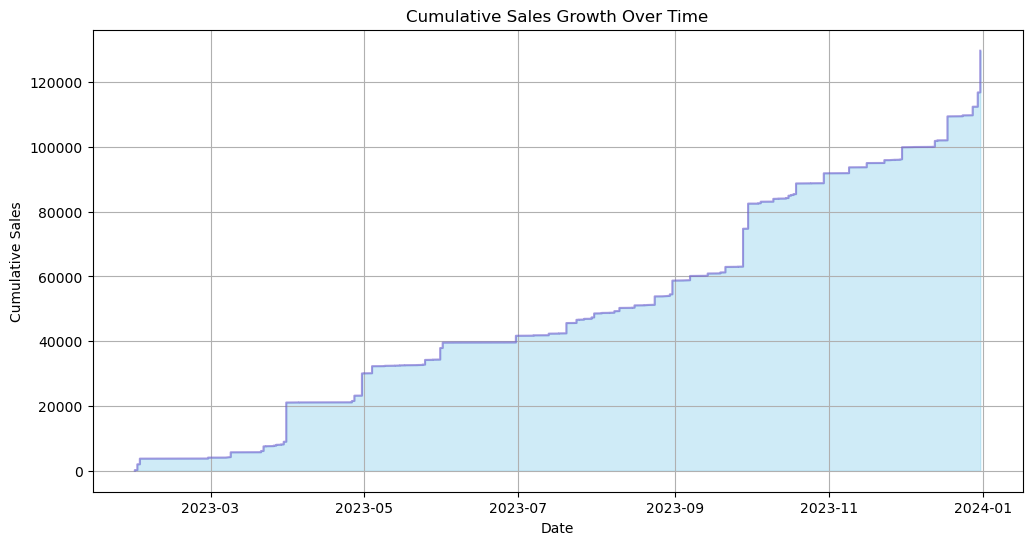

In [41]:
df['Posting Date'] = pd.to_datetime(df['Posting Date'])
df = df.sort_values(by='Posting Date')
df['Cumulative Sales'] = df['Quantity'].cumsum()

plt.figure(figsize=(12, 6))
plt.fill_between(df['Posting Date'], df['Cumulative Sales'], color="skyblue", alpha=0.4)
plt.plot(df['Posting Date'], df['Cumulative Sales'], color="Slateblue", alpha=0.6)
plt.title("Cumulative Sales Growth Over Time")
plt.xlabel("Date")
plt.ylabel("Cumulative Sales")
plt.grid()
plt.show()